# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Adwa Ahmad Al Bayan]
- **Email:** [adwaahmadlbayan3@gmail.com]
- **ID Dicoding:** [Adwa Ahmad Al Bayan]

## Menentukan Pertanyaan Bisnis


- bagaiman demografi perkembangan pengguna rental dua tahun terakhir? 
- Bagaimana hubungan jumlah pengguna rental sepeda dengan kondisi lingkungan dan cuaca?
- Bagaimana perbedaan jumlah pengguna rental sepeda berdasarkan type pengguna?
- Bagaimana perbedaan jumlah pengguna rental sepeda jam, hari, bulan, perseason?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
rental_bike_df = pd.read_csv('bike_sharing_dataset/hour.csv')
rental_bike_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- data rental sepeda perjam

### Assessing Data

#### melihat info dari data seperti tipe dari data 

In [4]:
rental_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### cek missing value

In [5]:
rental_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### memeriksa parameter statistik

In [6]:
rental_bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### memastikan data apakah memiliki duplikasi data

In [7]:
print('Jumlah duplikasi data per hari:', rental_bike_df.duplicated().sum())

Jumlah duplikasi data per hari: 0


**Insight:**
- tipe data dteday berupa object
- tipe data tahun berupa int (0/1)
- tipe data workingday berupa int (0/1)

### Cleaning Data

In [8]:

#merubah tipe data dteday ke datetime
rental_bike_df['dteday'] = pd.to_datetime(rental_bike_df['dteday'])

#merubah format tahun
rental_bike_df['yr'] = rental_bike_df.dteday.apply(lambda x: x.strftime('%Y'))

#merubah format jam (1-24)
rental_bike_df['hr'] = rental_bike_df.hr.apply(lambda x: x+1)

#merubah tipe data workingday menjadi boolean
rental_bike_df['workingday'] = rental_bike_df.workingday.apply(lambda x: True if x == 1 else False)
rental_bike_df.head(10)



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,1,0,6,False,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,2,0,6,False,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,3,0,6,False,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,4,0,6,False,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,5,0,6,False,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,2011,1,6,0,6,False,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,2011,1,7,0,6,False,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,2011,1,8,0,6,False,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,2011,1,9,0,6,False,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,2011,1,10,0,6,False,1,0.32,0.3485,0.76,0.0000,8,6,14


## Exploratory Data Analysis (EDA)

### Explore ...

In [33]:
rental_bike_df.corr(numeric_only=True)

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
mnth,0.489164,0.830386,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.319380,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


In [34]:
rental_bike_df.describe()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,6.537775,12.546752,0.028770,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,4.000000,7.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,7.000000,13.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,10.000000,19.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,12.000000,24.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [35]:
by_day = rental_bike_df.groupby('dteday').agg({
     'cnt': 'sum',
     'weekday': 'unique',
     'workingday': 'unique'
})
by_day.head(10)

,cnt,weekday,workingday
dteday,,,
2011-01-01,985,[6],[False]
2011-01-02,801,[0],[False]
2011-01-03,1349,[1],[True]
2011-01-04,1562,[2],[True]
2011-01-05,1600,[3],[True]
2011-01-06,1606,[4],[True]
2011-01-07,1510,[5],[True]
2011-01-08,959,[6],[False]
2011-01-09,822,[0],[False]


In [36]:
rental_bike_df.groupby('workingday').agg({
     'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
})

cnt                                        
                sum min  max        mean median         std
workingday                                                 
False       1000269   1  783  181.405332  119.0  172.853832
True        2292410   1  977  193.207754  151.0  185.107477

In [37]:
rental_bike_df.groupby(['yr', 'mnth', 'dteday']).agg({
     'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
     'temp':'mean'
}).head(30)

cnt                                            temp
                       sum min  max       mean median        std      mean
yr   mnth dteday                                                          
2011 1    2011-01-01   985   1  110  41.041667   35.5  34.292196  0.344167
          2011-01-02   801   1   93  34.826087   22.0  29.785067  0.363478
          2011-01-03  1349   1  157  61.318182   56.5  48.792453  0.196364
          2011-01-04  1562   1  212  67.913043   57.0  59.889985  0.200000
          2011-01-05  1600   2  195  69.565217   62.0  58.427753  0.226957
          2011-01-06  1606   1  219  69.826087   62.0  57.749185  0.204348
          2011-01-07  1510   1  210  65.652174   59.0  55.916016  0.196522
          2011-01-08   959   1  102  39.958333   29.0  32.256417  0.165000
          2011-01-09   822   1   92  34.250000   22.5  30.126184  0.138333
          2011-01-10  1321   1  188  55.041667   41.5  54.437423  0.150833
          2011-01-11  1263   3  217  57.409091   49.0  52.101238  0.169091
          2011-01-12  1162   1  139  52.818182   49.0  40.730983  0.172727
          2011-01-13  1406   2  202  58.583333   41.0  55.666645  0.165000
          2011-01-14  1421   1  159  61.782609   61.0  47.658784  0.160870
          2011-01-15  1248   1  129  52.000000   42.5  41.150836  0.233333
          2011-01-16  1204   1  118  50.166667   35.5  40.650864  0.231667
          2011-01-17  1000   1   93  41.666667   33.0  34.083869  0.175833
          2011-01-18   683   3  133  56.916667   38.0  43.193978  0.216667
          2011-01-19  1650   2  197  71.739130   70.0  56.977841  0.292174
          2011-01-20  1927   1  249  80.291667   69.0  69.294883  0.261667
          2011-01-21  1543   1  217  64.291667   60.5  56.551999  0.177500
          2011-01-22   981   2  103  42.652174   40.0  29.638134  0.059130
          2011-01-23   986   1  116  42.869565   28.0  35.250151  0.096522
          2011-01-24  1416   1  184  61.565217   57.0  53.816883  0.097391
          2011-01-25  1985   1  238  86.304348   68.0  71.606523  0.223478
          2011-01-26   506   1   72  31.625000   33.0  20.032890  0.217500
          2011-01-27   431  16  104  53.875000   48.5  32.467291  0.195000
          2011-01-28  1167   1  157  50.739130   38.0  45.049687  0.203478
          2011-01-29  1098   2  120  47.739130   36.0  34.385802  0.196522
          2011-01-30  1096   1  123  47.652174   33.0  38.943559  0.216522

In [38]:
rental_bike_df.groupby(['dteday']).agg({
     'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
     'temp':'mean'
}).head(32)

cnt                                            temp
             sum min  max       mean median        std      mean
dteday                                                          
2011-01-01   985   1  110  41.041667   35.5  34.292196  0.344167
2011-01-02   801   1   93  34.826087   22.0  29.785067  0.363478
2011-01-03  1349   1  157  61.318182   56.5  48.792453  0.196364
2011-01-04  1562   1  212  67.913043   57.0  59.889985  0.200000
2011-01-05  1600   2  195  69.565217   62.0  58.427753  0.226957
2011-01-06  1606   1  219  69.826087   62.0  57.749185  0.204348
2011-01-07  1510   1  210  65.652174   59.0  55.916016  0.196522
2011-01-08   959   1  102  39.958333   29.0  32.256417  0.165000
2011-01-09   822   1   92  34.250000   22.5  30.126184  0.138333
2011-01-10  1321   1  188  55.041667   41.5  54.437423  0.150833
2011-01-11  1263   3  217  57.409091   49.0  52.101238  0.169091
2011-01-12  1162   1  139  52.818182   49.0  40.730983  0.172727
2011-01-13  1406   2  202  58.583333   41.0  55.666645  0.165000
2011-01-14  1421   1  159  61.782609   61.0  47.658784  0.160870
2011-01-15  1248   1  129  52.000000   42.5  41.150836  0.233333
2011-01-16  1204   1  118  50.166667   35.5  40.650864  0.231667
2011-01-17  1000   1   93  41.666667   33.0  34.083869  0.175833
2011-01-18   683   3  133  56.916667   38.0  43.193978  0.216667
2011-01-19  1650   2  197  71.739130   70.0  56.977841  0.292174
2011-01-20  1927   1  249  80.291667   69.0  69.294883  0.261667
2011-01-21  1543   1  217  64.291667   60.5  56.551999  0.177500
2011-01-22   981   2  103  42.652174   40.0  29.638134  0.059130
2011-01-23   986   1  116  42.869565   28.0  35.250151  0.096522
2011-01-24  1416   1  184  61.565217   57.0  53.816883  0.097391
2011-01-25  1985   1  238  86.304348   68.0  71.606523  0.223478
2011-01-26   506   1   72  31.625000   33.0  20.032890  0.217500
2011-01-27   431  16  104  53.875000   48.5  32.467291  0.195000
2011-01-28  1167   1  157  50.739130   38.0  45.049687  0.203478
2011-01-29  1098   2  120  47.739130   36.0  34.385802  0.196522
2011-01-30  1096   1  123  47.652174   33.0  38.943559  0.216522
2011-01-31  1501   1  185  62.541667   55.0  52.830310  0.180833
2011-02-01  1360   2  176  59.130435   52.0  50.804710  0.192174

In [39]:
rental_bike_df.groupby(['yr', 'season']).agg({
     'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
     'temp':'mean'
})

cnt                                              temp
                sum min  max        mean median         std      mean
yr   season                                                          
2011 1       150000   1  405   72.533849   56.0   67.447952  0.275348
     2       347316   1  638  157.655924  130.0  138.421632  0.534607
     3       419650   1  651  187.343750  163.0  149.352219  0.701339
     4       326137   1  625  152.828960  127.0  133.225077  0.426354
2012 1       321348   1  801  147.814167  110.5  143.702976  0.321785
     2       571273   1  957  258.963282  226.0  216.017955  0.554705
     3       641479   2  977  284.343528  254.0  226.013549  0.711445
     4       515476   1  967  245.698761  205.5  212.462838  0.419867

In [40]:
rental_bike_df.groupby('yr').agg({
    'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std']
})

cnt                                        
          sum min  max        mean median         std
yr                                                   
2011  1243103   1  651  143.794448  109.0  133.797854
2012  2049576   1  977  234.666361  191.0  208.910941

In [41]:
rental_bike_df.groupby('season').agg({
     'cnt': ['sum','mean', 'max', 'min', 'std'],
     'temp':'mean' 
}).reset_index()


season      cnt                                       temp
              sum        mean  max min         std      mean
0      1   471348  111.114569  801   1  119.224010  0.299147
1      2   918589  208.344069  957   1  188.362473  0.544663
2      3  1061129  236.016237  977   1  197.711630  0.706410
3      4   841613  198.868856  967   1  182.967972  0.423138

In [42]:
by_season = rental_bike_df.groupby('season').agg({
     'cnt': ['sum','mean', 'max', 'min', 'std'],
     'temp':'mean' 
}, inplace=True).reset_index()
by_season
by_season['season'] = by_season.season.apply(lambda x: 'springer' if x==1 else('summer'if  x==2 else ('fall' if x==3 else 'winter')))
by_season

season      cnt                                       temp
                 sum        mean  max min         std      mean
0  springer   471348  111.114569  801   1  119.224010  0.299147
1    summer   918589  208.344069  957   1  188.362473  0.544663
2      fall  1061129  236.016237  977   1  197.711630  0.706410
3    winter   841613  198.868856  967   1  182.967972  0.423138

In [43]:
rental_bike_df.groupby('weekday').agg({
     'cnt': ['sum','mean', 'max', 'min', 'std']
})

cnt                                 
            sum        mean  max min         std
weekday                                         
0        444027  177.468825  776   1  168.167710
1        455503  183.744655  968   1  179.514167
2        469109  191.238891  970   1  187.820480
3        473048  191.130505  977   1  190.894464
4        485395  196.436665  976   1  188.011923
5        487790  196.135907  957   1  174.076894
6        477807  190.209793  783   1  179.820569

In [44]:
rental_bike_df.groupby('mnth').agg({
    'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
    'temp':'mean' 
})

cnt                                              temp
         sum min  max        mean median         std      mean
mnth                                                          
1     134933   1  559   94.424773   66.0   99.907146  0.237649
2     151352   1  610  112.865026   82.0  112.486565  0.300209
3     228920   1  957  155.410726  104.0  163.543050  0.390903
4     269094   1  822  187.260960  136.0  181.137902  0.470021
5     331686   1  873  222.907258  188.5  187.721497  0.594798
6     346342   1  900  240.515278  203.0  196.038950  0.684097
7     344948   1  913  231.819892  202.0  187.483806  0.755470
8     351194   1  941  238.097627  204.0  200.444648  0.708705
9     345991   1  977  240.773138  190.0  214.609531  0.616507
10    322352   1  963  222.158511  174.0  203.477057  0.487181
11    254831   1  729  177.335421  145.0  158.973887  0.369200
12    211036   1  759  142.303439  106.0  141.080674  0.324167

In [45]:
rental_bike_df.groupby('weathersit').agg({
    'cnt': ['sum', 'min', 'max', 'mean', 'median', 'std'],
    'temp':'mean' 
})

cnt                                              temp
                sum min  max        mean median         std      mean
weathersit                                                           
1           2338173   1  977  204.869272  159.0  189.487773  0.511054
2            795952   1  957  175.165493  133.0  165.431589  0.474445
3            158331   1  891  111.579281   63.0  133.781045  0.456688
4               223  23  164   74.333333   36.0   77.925178  0.186667

In [46]:
rental_bike_df[rental_bike_df.weathersit ==4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,2011,1,17,0,3,True,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,2012,1,19,0,1,True,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,2012,1,2,0,6,False,4,0.14,0.1364,0.86,0.1940,1,22,23


In [47]:
rental_bike_df.groupby('yr').agg({
     'casual': ['sum', 'min', 'max', 'mean', 'median', 'std'],
     'registered': ['sum', 'min', 'max', 'mean', 'median', 'std']
})

casual                                       registered           \
         sum min  max       mean median        std        sum min  max   
yr                                                                       
2011  247252   0  272  28.600578   14.0  38.840789     995851   0  567   
2012  372765   0  367  42.679757   20.0  56.970413    1676811   0  886   

                                     
            mean median         std  
yr                                   
2011  115.193869   90.0  109.461014  
2012  191.986604  156.0  175.481637

**Insight:**
- jumlah pengguna rental berhubungan dengan kondisi lingkungan dan cuaca
- pengguna mengalami kenaikan per tahun
- pengguna di hari senin-jum'at lebih banyak daripa hari sabtu dan minggu
- pengguna di musim semi lebih sedikit dari musim lain
- pengguna registered lebih banyak dari pengguna casual
- pada hari dengan kondisi cuaca yang ekstrim, minimal pengguna lebih banyak dari pada kondisi cuaca lain, namun pengguna untuk nilai paling maximal kurang dari maximal pengguna pada kondisi cuaca lain

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Grafik perkembangan pengguna rental sepeda (2011-2012)

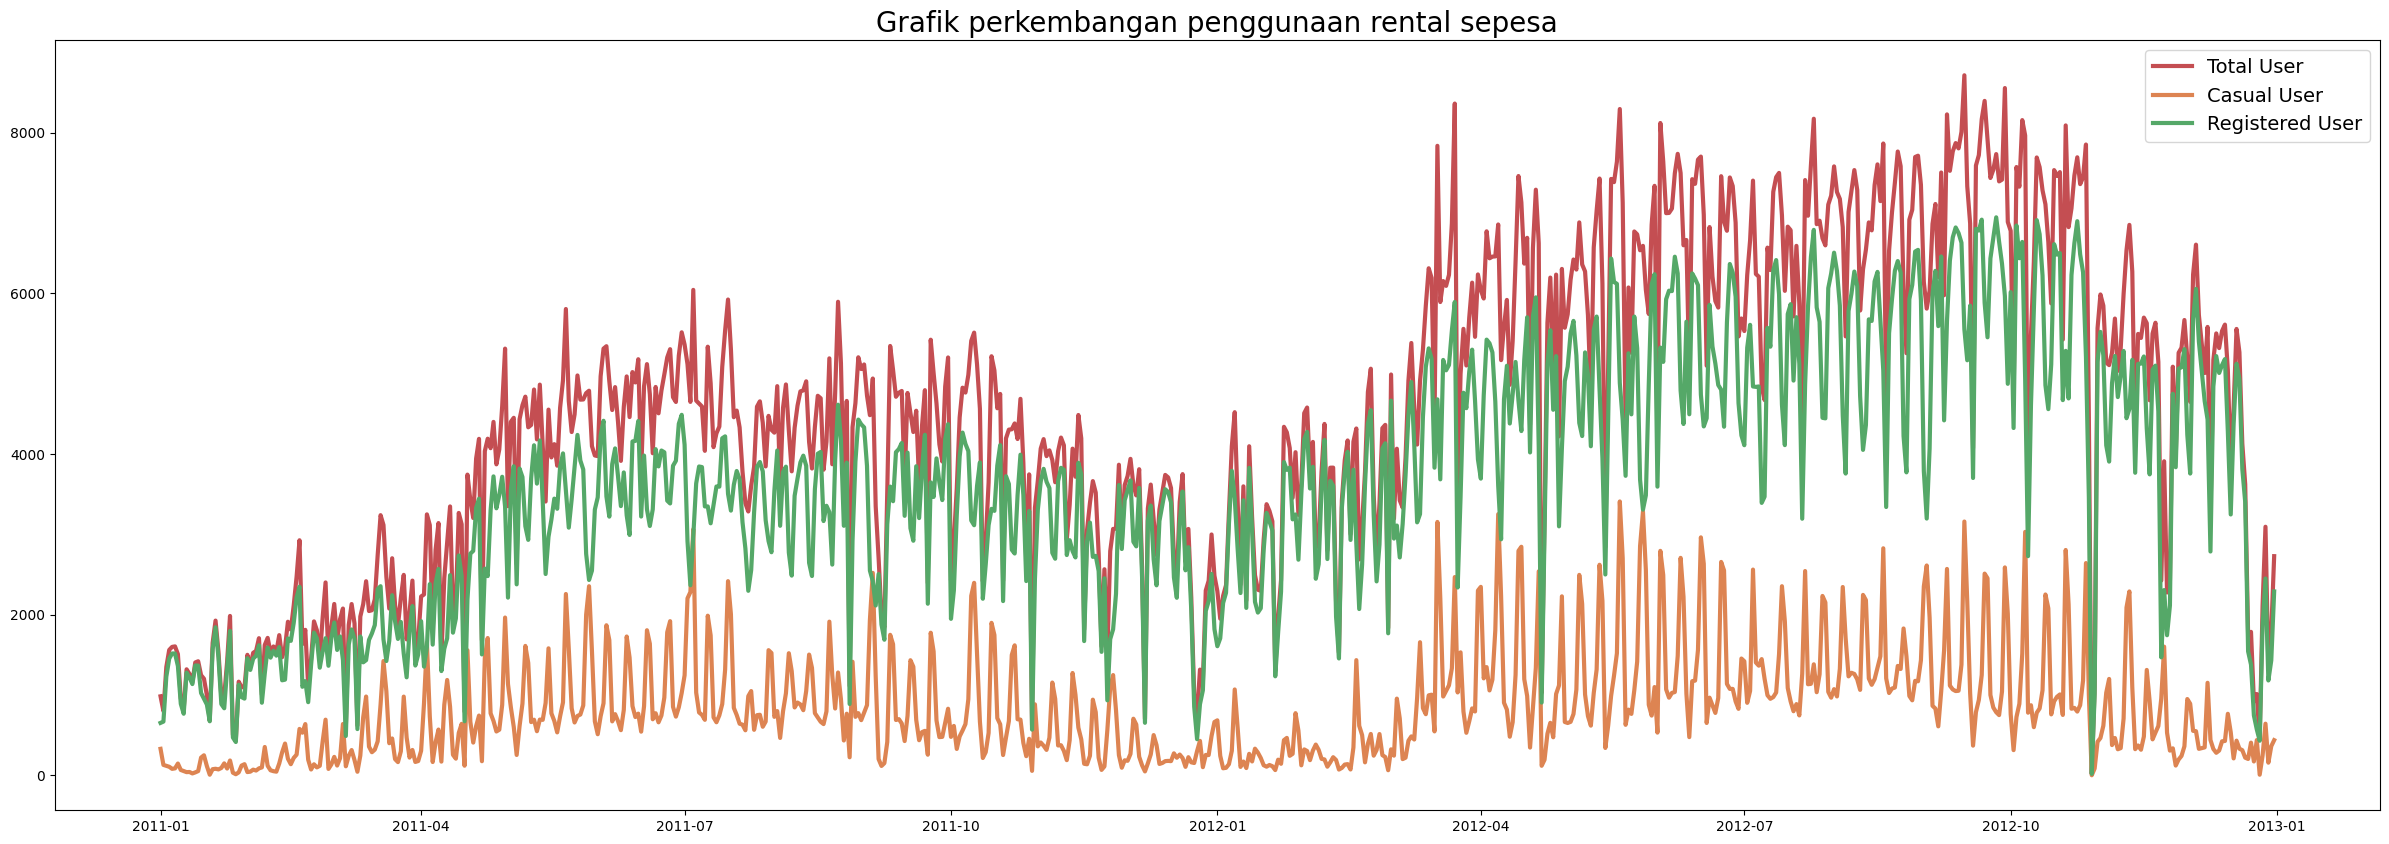

In [24]:
#group data berdasrkan tanggal
by_day_df = rental_bike_df.groupby('dteday').agg({
     'cnt': 'sum',
     'casual': 'sum',
     'registered': 'sum',
     'temp':'mean',
},inpalce=True).reset_index()
by_day_df.columns = ['tanggal', 'total', 'cs_total', 'rg_total', 'avg_temp']

plt.figure(figsize=(30,10))

plt.plot(by_day_df["tanggal"], by_day_df["total"], linewidth=3, color='#C44E52', label='Total User') 
plt.plot(by_day_df["tanggal"], by_day_df["cs_total"], marker='', linewidth=3, color='#DD8452', label='Casual User') 
plt.plot(by_day_df["tanggal"], by_day_df["rg_total"], marker='', linewidth=3, color='#55A868', label='Registered User') 

plt.title('Grafik perkembangan penggunaan rental sepesa', loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=14)
plt.show()


## Pertanyaan 2:
- Hubungan antara jumlah pengguna dengan kondisi lingkungan

C:\Users\USER\AppData\Local\Temp\ipykernel_10716\63506941.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=by_weathersit_df['avg_user'] ,x=by_weathersit_df['weathersit'], data=by_weathersit_df, palette='tab10' ,ax=ax)


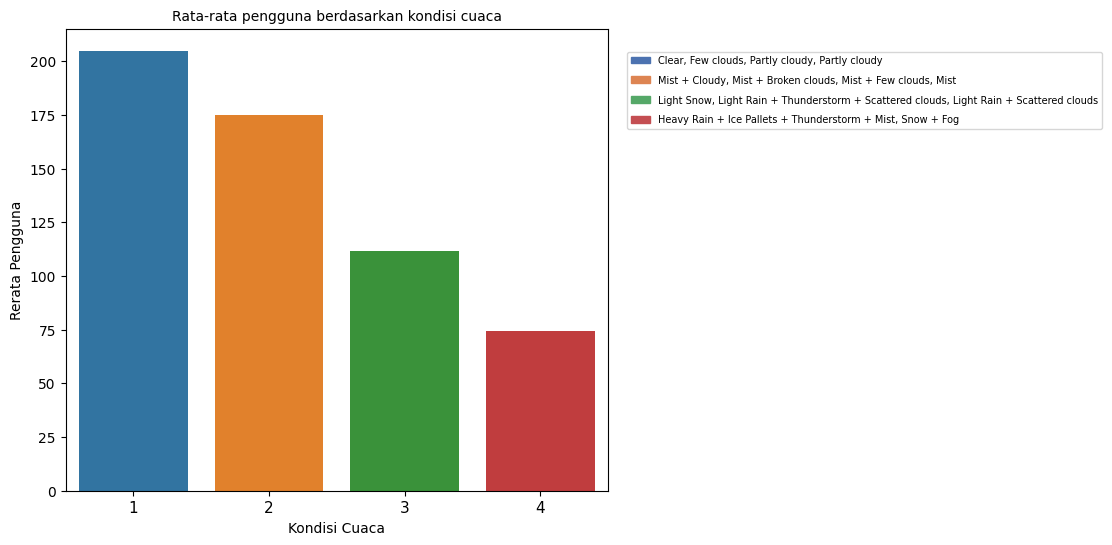

In [25]:
#group data berdasarkan weathersit
by_weathersit_df = rental_bike_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean'],
    'temp':'mean' 
}, inplace=True).reset_index()
by_weathersit_df.columns = ['weathersit','total_user', 'avg_user', 'avg_temp']
by_weathersit_df['avg_temp'] = by_weathersit_df['avg_temp'].apply(lambda x: round(x*41,0))

labels = ['Clear, Few clouds, Partly cloudy, Partly cloudy','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']
fig, ax = plt.subplots(figsize=(7, 6))

biru = mpatches.Patch(color='#4C72B0')
orange = mpatches.Patch(color='#DD8452')
hijau = mpatches.Patch(color='#55A868')
merah = mpatches.Patch(color='#C44E52')

#grafik barplot 
sns.barplot(y=by_weathersit_df['avg_user'] ,x=by_weathersit_df['weathersit'], data=by_weathersit_df, palette='tab10' ,ax=ax)
ax.set_title('Rata-rata pengguna berdasarkan kondisi cuaca', fontsize=10)
ax.set_ylabel('Rerata Pengguna')
ax.set_xlabel('Kondisi Cuaca')
ax.tick_params(axis='x', labelsize=11)

fig.legend(handles=[biru, orange, hijau, merah],labels=labels, loc='upper left', bbox_to_anchor=(0.92, 0.85), fontsize=7, labelspacing=1)

- grafik hubungan jumlah pengguna dengan suhu udara

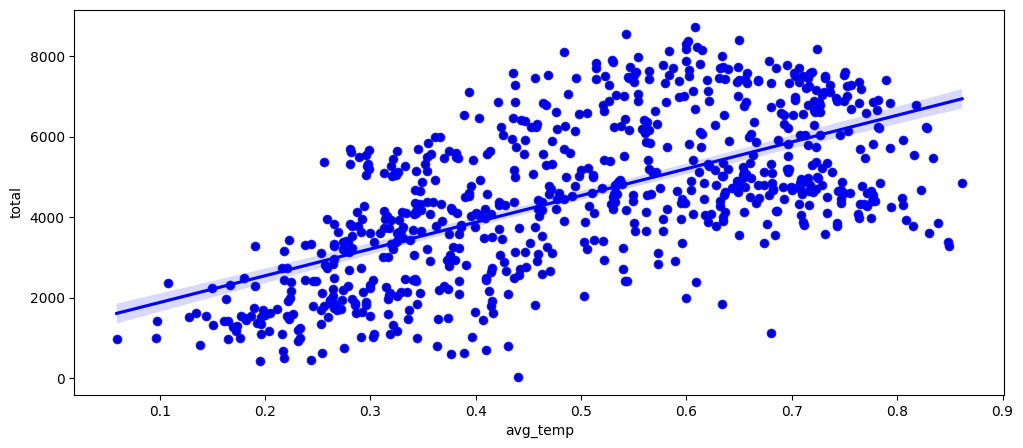

In [26]:
# by_day_df['avg_temp'] = by_day_df['avg_temp'].apply(lambda x: x*41)

plt.figure(figsize=(12,5))
sns.scatterplot(y=by_day_df['total'],x=by_day_df['avg_temp'], color='black')
sns.regplot(y=by_day_df['total'],x=by_day_df['avg_temp'], color='blue')

plt.show()

## Pertanyaan 3:
- Perbedaan pengguna tipe Casual dan Registered

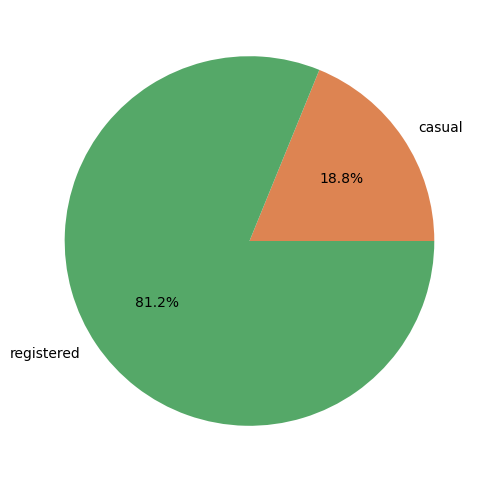

In [27]:
total_user_by_type_df = rental_bike_df.agg({
     'casual': 'mean',
     'registered': 'mean'
}, inplace= True).reset_index()

colors = ['#C44E52' ,'#4C72B0']

total_user_by_type_df.columns = ['type_user', 'mean']
plt.figure(figsize=(6,6))
plt.pie(
     x='mean',
     labels='type_user',
     data=total_user_by_type_df,
     autopct='%1.1f%%',
     colors=['#DD8452','#55A868']
)
plt.show()


## Pertanyaan 4:
- Perbedaan rata-rata jumlah pengguna rental perseason

C:\Users\USER\AppData\Local\Temp\ipykernel_10716\1539032087.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


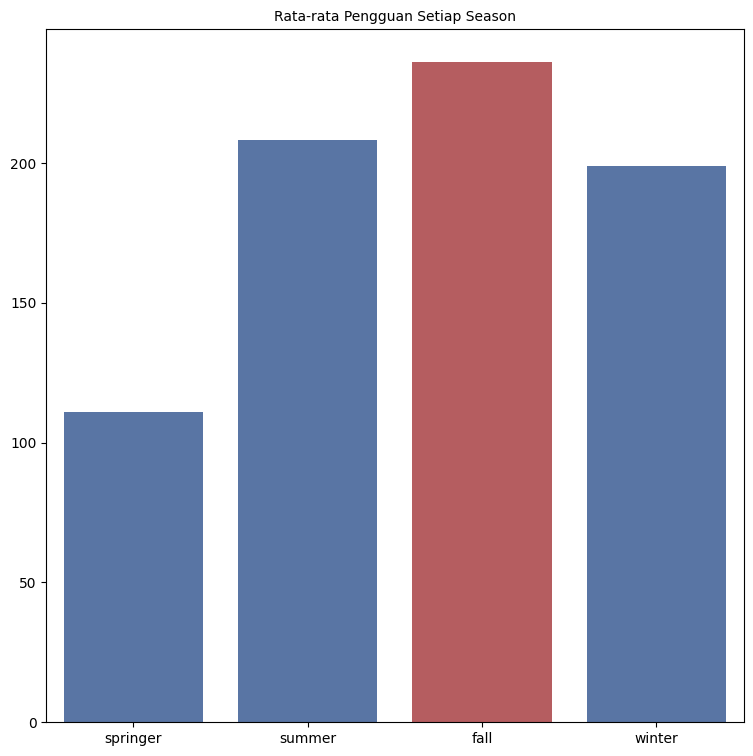

In [28]:
#group berdasarkan season
by_season_df = rental_bike_df.groupby('season').agg({
     'cnt': 'mean',
     'temp':'mean' 
}, inplace=True).reset_index()

by_season_df['season'] = by_season_df.season.apply(lambda x: 'springer' if x==1 else('summer'if  x==2 else ('fall' if x==3 else 'winter')))

#Cari indeks bulan dengan rata-rata pengguna tertinggi
max = by_season_df['cnt'].idxmax()

# Buat daftar warna, warna merah untuk nilai maksimum dan warna lain untuk yang lainnya
colors = [ '#C44E52' if i == max else  '#4C72B0' for i in range(len(by_season_df))]

plt.figure(figsize=(9,9))
sns.barplot(
     x='season',
     y='cnt',
     data=by_season_df,
     palette=colors
)

plt.title('Rata-rata Pengguan Setiap Season', loc='center', fontsize=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)

## Pertanyaan 5:
- Perbedaan rata-rata pengguna perhari (Senin-Minggu)

C:\Users\USER\AppData\Local\Temp\ipykernel_10716\1901046306.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=by_weekday_df['weekday'], y=by_weekday_df['avg_user'], data=by_weekday_df, palette=colors)


<Axes: xlabel='weekday', ylabel='avg_user'>

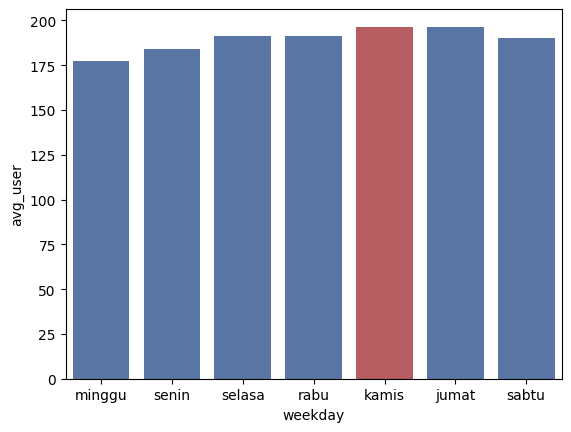

In [29]:
by_weekday_df = rental_bike_df.groupby('weekday').agg({
     'cnt': 'mean',
}).reset_index()

by_weekday_df.rename(columns={
     'cnt': 'avg_user',
}, inplace=True)

weekday_mapping = {
    0: 'minggu', 1: 'senin', 2: 'selasa', 3: 'rabu', 
    4: 'kamis', 5: 'jumat', 6: 'sabtu'
}
by_weekday_df['weekday'] = by_weekday_df['weekday'].map(weekday_mapping)

#Cari indeks bulan dengan rata-rata pengguna tertinggi
max = by_weekday_df['avg_user'].idxmax()

# Buat daftar warna, warna merah untuk nilai maksimum dan warna lain untuk yang lainnya
colors = [ '#C44E52' if i == max else  '#4C72B0' for i in range(len(by_weekday_df))]

sns.barplot(x=by_weekday_df['weekday'], y=by_weekday_df['avg_user'], data=by_weekday_df, palette=colors)

### Pertanyaan 6:
- Perbedaan rata-rata pengguna perbulan

C:\Users\USER\AppData\Local\Temp\ipykernel_10716\2540491225.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  by_month_df = rental_bike_df.resample(rule='M', on='dteday').agg({
C:\Users\USER\AppData\Local\Temp\ipykernel_10716\2540491225.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=by_month_df['avg_user'] ,x=by_month_df['mnth'], data=by_month_df, palette=colors ,ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_10716\2540491225.py:24: UserWarning: The palette list has more values (24) than needed (12), which may not be intended.
  sns.barplot(y=by_month_df['avg_user'] ,x=by_month_df['mnth'], data=by_month_df, palette=colors ,ax=ax[0])


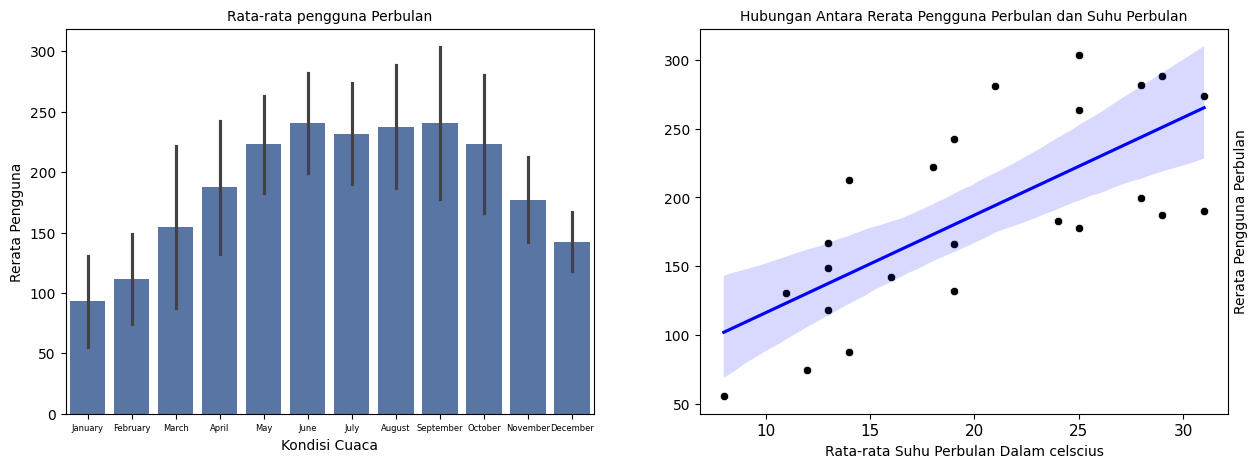

In [30]:
by_month_df = rental_bike_df.resample(rule='M', on='dteday').agg({
     'cnt': ['sum','mean'],
     'temp':'mean'
}).reset_index()

#ubah format tanggal ke bulan
by_month_df['dteday'] = by_month_df['dteday'].dt.strftime('%B')

#ubah nama kolom
by_month_df.columns = ['mnth', 'total_user', 'avg_user', 'avg_temp']

#ubah format temperatur ke celcius
by_month_df['avg_temp'] = by_month_df['avg_temp'].apply(lambda x: round(x*41,0))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Cari indeks bulan dengan rata-rata pengguna tertinggi
max_idx = by_month_df['avg_user'].idxmax()

# Buat daftar warna, warna merah untuk nilai maksimum dan warna lain untuk yang lainnya
colors = [ '#C44E52' if i == max_idx else '#4C72B0' for i in range(len(by_month_df))]

#grafik barplot
sns.barplot(y=by_month_df['avg_user'] ,x=by_month_df['mnth'], data=by_month_df, palette=colors ,ax=ax[0])
ax[0].set_title('Rata-rata pengguna Perbulan', fontsize=10)
ax[0].set_ylabel('Rerata Pengguna')
ax[0].set_xlabel('Kondisi Cuaca')
ax[0].tick_params(axis='x', labelsize=6)

#grafik scaterplot
sns.scatterplot(y=by_month_df['avg_user'] ,x=by_month_df['avg_temp'], data=by_month_df ,ax=ax[1], color='black')
sns.regplot(y=by_month_df['avg_user'], x=by_month_df['avg_temp'], scatter=False, color='blue', ax=ax[1])
ax[1].set_title('Hubungan Antara Rerata Pengguna Perbulan dan Suhu Perbulan', fontsize=10)
ax[1].set_ylabel("Rerata Pengguna Perbulan")
ax[1].yaxis.set_label_position('right')
ax[1].set_xlabel('Rata-rata Suhu Perbulan Dalam celscius')
ax[1].tick_params(axis='x', labelsize=11)

- rata-rata jumlah pengguna per jam

<Axes: xlabel='hr', ylabel='cnt'>

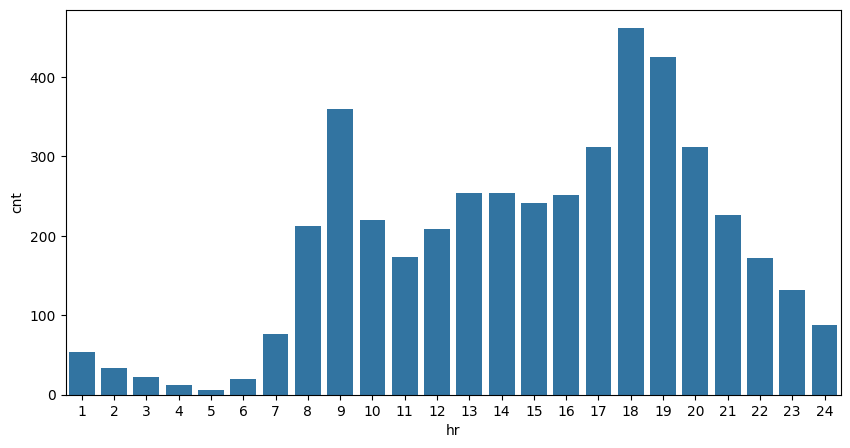

In [32]:
by_hour_df = rental_bike_df.groupby('hr').agg({
     'cnt': 'mean'
}, inplace=True).reset_index()
by_hour_df
plt.figure(figsize=(10,5))

sns.barplot(x=by_hour_df['hr'], y=by_hour_df['cnt'], data=by_hour_df)


## Conclusion

- Perkembangan pengguna rental sepepda dari 2011 hingga 2012 mengalami kenaikan
- Pengguna pada kondisi cuaca ekstrim cenderung lebih sedikit dan rata-rata suhu udara perhari memiliki hubungan  dengan rata-rata jumlah pengguna perhari
- Pengguna tipe registered lebih banyak dari pengguna casual
- Rata-rata pengguna rental sepeda paling banyak pada musim gugur
- Rata-rata jumlah pengguna paling banyak adalah hari kamis
